In [8]:
import numpy as np
import matplotlib.pyplot as plt
import SimLight as sl
import SimLight.plottools as slpl

In [9]:
wavelength = 0.550  # µm
size = 1.8 * 2  # mm
N = 2000  # pixel number
j = 15  # zernike order
mag = 3.5  # magnification

In [10]:
F_mag = sl.PlaneWave(wavelength, size*mag, N)
L_mag = sl.Lens.new_lens(size*mag, f=20)

In [11]:
x = np.linspace(-size / 2, size / 2, N)
X, Y = np.meshgrid(x, x)
rho = np.sqrt(X**2 + Y**2) / (size / 2)
longitude = -mag**2 * 1e-4 * (rho**7 - 0.5 * rho**5 +0.5 * rho**9 - 0.05 * rho**3 + 0.05 * rho**11 - 0.1)

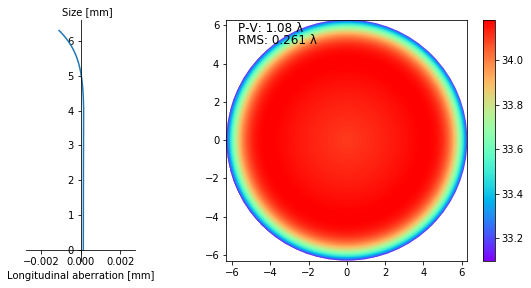

In [12]:
L_ol = sl.Lens.new_lens(size*mag, f=1.8*mag)
F_ol = sl.longitudinal_to_wavefront(L_ol, longitude)
F_olc = sl.circle_aperture(F_ol)
F_olc = sl.near_field_propagation(F_olc, L_mag, z=20, mag=1)

In [13]:
Z = sl.zernike.ZernikeCoefficients(j)
Z_001 = sl.zernike.ZernikeCoefficients(j)
Z_001.coefficients[0] = 0.01651978
Z_001.coefficients[4] = 0.00569125
Z_001.coefficients[12] = -0.00225499
Z_003 = sl.zernike.ZernikeCoefficients(j)
Z_003.coefficients[0] = 0.04963807
Z_003.coefficients[4] = 0.01711096
Z_003.coefficients[12] = -0.00677433
Z_005 = sl.zernike.ZernikeCoefficients(j)
Z_005.coefficients[0] = 0.08286107
Z_005.coefficients[4] = 0.02858015
Z_005.coefficients[12] = -0.01130614
Z_01 = sl.zernike.ZernikeCoefficients(j)
Z_01.coefficients[0] = 0.16637466
Z_01.coefficients[4] = 0.05746862
Z_01.coefficients[12] = -0.02268995
Z_03 = sl.zernike.ZernikeCoefficients(j)
Z_03.coefficients[0] = 0.50685797
Z_03.coefficients[4] = 0.17606016
Z_03.coefficients[12] = -0.06899037
Z_05 = sl.zernike.ZernikeCoefficients(j)
Z_05.coefficients[0] = 0.85740249
Z_05.coefficients[4] = 0.29940577
Z_05.coefficients[12] = -0.11648825

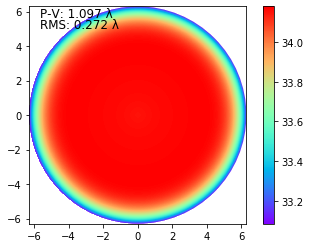

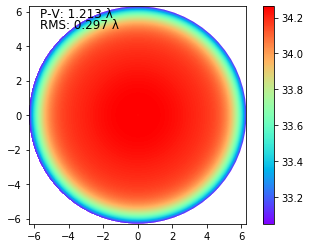

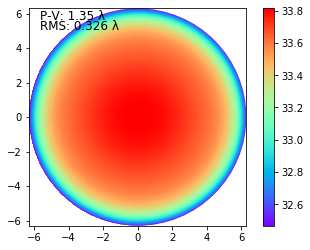

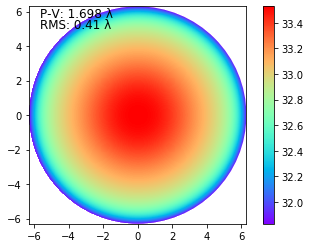

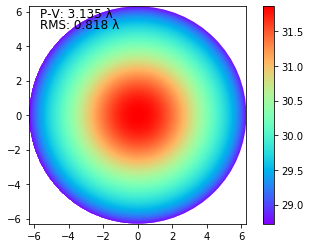

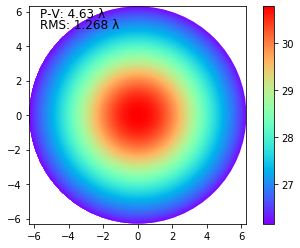

In [14]:
Z_001.coefficients *= mag
F_001 = sl.aberration(F_ol, Z_001)
F_001.plot_wavefront(mask_r=1, dimension=2)
Z_003.coefficients *= mag
F_003 = sl.aberration(F_ol, Z_003)
F_003.plot_wavefront(mask_r=1, dimension=2)
Z_005.coefficients *= mag
F_005 = sl.aberration(F_ol, Z_005)
F_005.plot_wavefront(mask_r=1, dimension=2)
Z_01.coefficients *= mag
F_01 = sl.aberration(F_ol, Z_01)
F_01.plot_wavefront(mask_r=1, dimension=2)
Z_03.coefficients *= mag
F_03 = sl.aberration(F_ol, Z_03)
F_03.plot_wavefront(mask_r=1, dimension=2)
Z_05.coefficients *= mag
F_05 = sl.aberration(F_ol, Z_05)
F_05.plot_wavefront(mask_r=1, dimension=2)

In [15]:
F_c = sl.circle_aperture(F_mag)
F_c = sl.near_field_propagation(F_c, L_mag, z=20, mag=1)
F_001c = sl.circle_aperture(F_001)
F_001c = sl.near_field_propagation(F_001c, L_mag, z=20, mag=1)
F_003c = sl.circle_aperture(F_003)
F_003c = sl.near_field_propagation(F_003c, L_mag, z=20, mag=1)
F_005c = sl.circle_aperture(F_005)
F_005c = sl.near_field_propagation(F_005c, L_mag, z=20, mag=1)
F_01c = sl.circle_aperture(F_01)
F_01c = sl.near_field_propagation(F_01c, L_mag, z=20, mag=1)
F_03c = sl.circle_aperture(F_03)
F_03c = sl.near_field_propagation(F_03c, L_mag, z=20, mag=1)
F_05c = sl.circle_aperture(F_05)
F_05c = sl.near_field_propagation(F_05c, L_mag, z=20, mag=1)

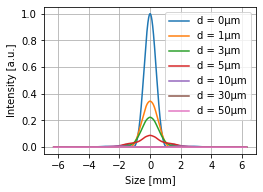

In [16]:
labels = ['d = 0µm',
          'd = 1µm',
          'd = 3µm',
          'd = 5µm',
          'd = 10µm',
          'd = 30µm',
          'd = 50µm']
slpl.plot_multi_intensities_diff(F_c, F_001c, F_003c, F_005c, F_01c, F_03c, F_05c, labels=labels, norm_type=1, figsize=(3.8, 2.7))

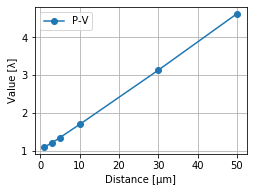

In [17]:
PV = [1.097, 1.213, 1.350, 1.698, 3.135, 4.630]
RMS = [0.021, 0.064, 0.107, 0.216, 0.661, 1.123]
d = [1, 3, 5, 10, 30, 50]
fig = plt.figure(figsize=(3.8, 2.7))
ax = fig.add_subplot(111)
im1 = ax.plot(d, PV, label='P-V', marker='o')
#im2 = ax.plot(d, RMS, label='RMS', marker='s')
ax.set_xlabel('Distance [µm]')
ax.set_ylabel('Value [λ]')
ax.legend()
ax.grid(True)

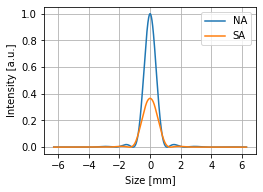

In [18]:
labels2 = ['NA',
           'SA']
slpl.plot_multi_intensities_diff(F_c, F_olc, labels=labels2, norm_type=1, figsize=(3.8, 2.7))